In [1]:
import numpy as np
%matplotlib inline
import Corrfunc
import glob

import utils
import plotter

%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

import cmasher as cmr

In [2]:
def plot_cf_err(rs, cf_arrs, r_true, cf_true, labels, colors, err=False, xlim=None, errlim=None, cont=True, bases=None):
    
    if np.array(rs).ndim == 1:
        rs = [rs]
    if np.array(cf_arrs).ndim == 2:
        cf_arrs = np.array([cf_arrs])
    
    cfs_mean = []
    error_regions = []
    for cfs in cf_arrs:
        mean = np.mean(cfs, axis=0)
        cfs_mean.append(mean)
        std = np.std(cfs, axis=0)
        error_regions.append([mean-std, mean+std])
    
    plotter.plot_cf_cont(rs, cfs_mean, r_true, cf_true, labels, colors, error_regions=error_regions, 
                         err=err, xlim=xlim, errlim=errlim, cont=cont, bases=bases)

In [131]:
def plot_continuous(cat_tag, cf_tags, Nrealizations=100, colors=None, labels=None, err=True, errlim=None, 
                    cont=True, show_bases=True, xlim=None):
    
    if colors is None:
        colors = ['lime','blue', 'cyan', 'magenta', 'purple']
    if labels is None:
        labels = [f"{tag.split('_')[1]}, bin width {tag.split('bw')[-1]}" for tag in cf_tags]
    if xlim is None:
        xlim = [40.0, 148.0]
    
    cat_dir = '../catalogs'
    result_dir = '../results/results_lognormal{}'.format(cat_tag)

    rs = []
    cf_arrs = []
    if show_bases:
        bases = []

    for i in range(len(cf_tags)):
        cf_tag = cf_tags[i]
        xis = []
        n_converged = 0

        for Nr in range(Nrealizations):
            
            if 'baoiter' in cf_tags[i]:
                fn_pattern = f"cf{cf_tag}_converged_*{cat_tag}_rlz{Nr}.npy"
                for cf_fn in glob.glob(f'{result_dir}/{fn_pattern}'):
                    #print(cf_fn)
                    r_avg, xi, amps, _, _ = np.load(cf_fn, allow_pickle=True)
                    #print("C:", amps[4])
                    n_converged +=1
                    break #should only be 1 match; but probs better way to do this
            else:
                cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tag, cat_tag, Nr)
                r_avg, xi, amps = np.load(cf_fn, allow_pickle=True)
            
            xis.append(xi)
        rs.append(r_avg)
        cf_arrs.append(xis)     

        if show_bases:
            if 'tophat' in cf_tag:
                rmin = min(r_avg)
                rmax = max(r_avg)
                binwidth = float(cf_tag.split('bw')[-1])
                r_edges = np.arange(rmin, rmax+binwidth, binwidth)
                base = np.zeros((len(r_avg), len(r_edges))) #r_edges - 1 (bc edges not bins), +1 (bc ravg)
                base[:,0] = r_avg
                for rr in range(len(r_edges)-1):
                    base[:,rr+1] = [1.0 if r_edges[rr]<=r_avg[jj]<r_edges[rr+1] else 0.0 for jj in range(len(r_avg))]
            else:
                if 'baoiter' in cf_tag:
                    projfn = f'../tables/bases{cf_tag}{cat_tag}.dat'
                else:
                    projfn = f'../tables/bases{cf_tag}.dat'
                base = np.loadtxt(projfn)
                bmax = max(np.array([base[bb,1:] for bb in range(base.shape[0]) if xlim[0]<base[bb,0]<xlim[1]]).flatten())
                base[:,1:] /= bmax   
            bases.append(base)        
                
    true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
    r_true, xi_true = np.loadtxt(true_fn, unpack=True)
    b1 = 1.5    
    xi_true *= b1**2

    plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors, err=err, xlim=xlim, 
                errlim=errlim, cont=cont, bases=bases)

In [5]:
ctopmany = '#33BBEE'
ctopfew = '#0077BB'
cspline = '#EE3377'
cbao = '#228833'
ctheory = '#808080'

(2, 1000)
rmse: True
plotting
0.0010186 100000.0


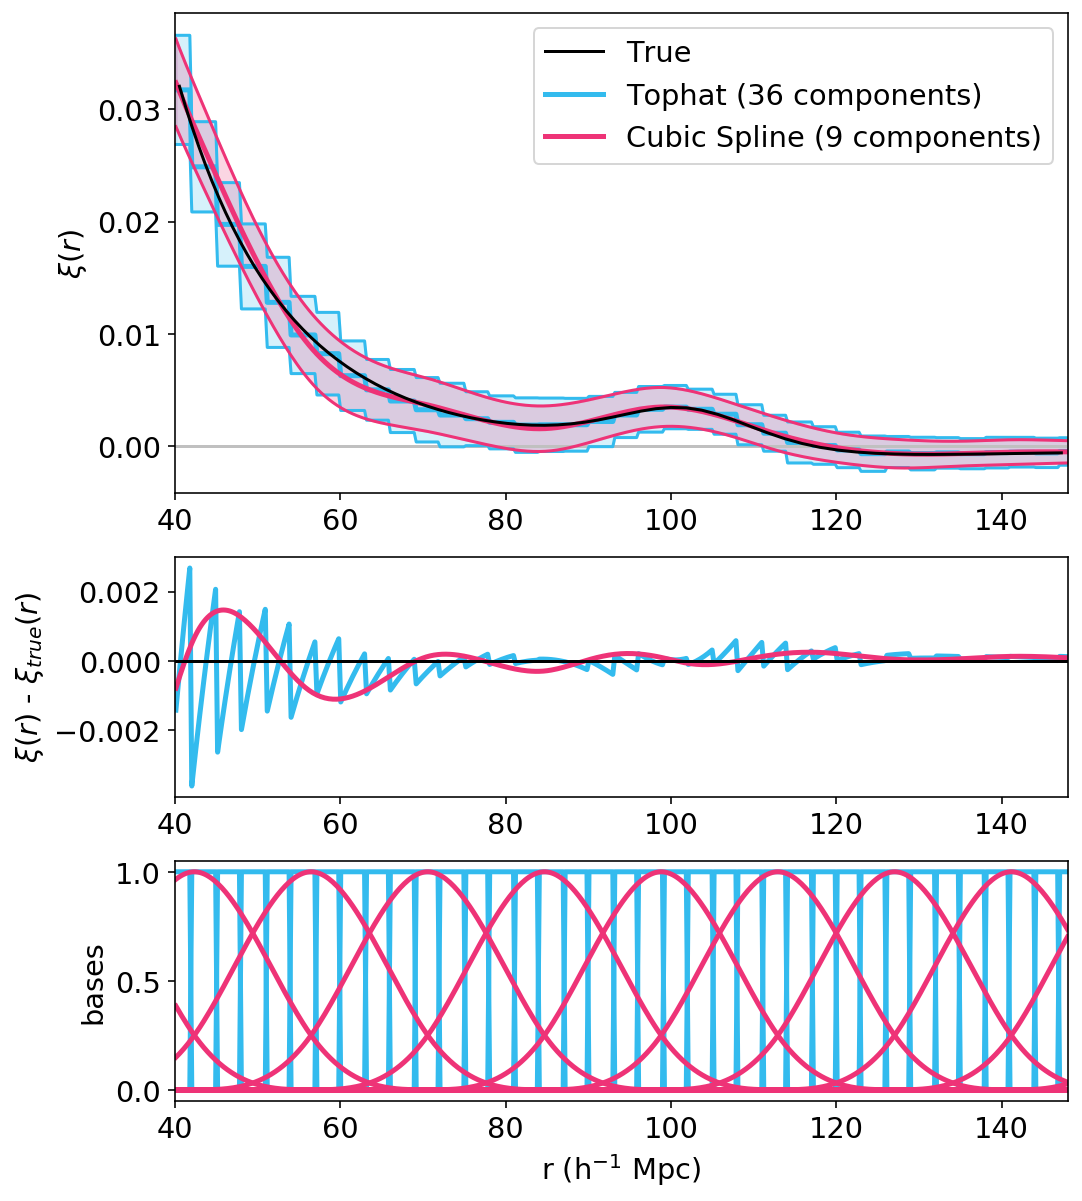

In [111]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_tophat_bw3', '_spline3_bw12']

colors = [ctopmany, cspline]
labels = ['Tophat (36 components)', 'Cubic Spline (9 components)']
plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels)

(2, 1000)
rmse: True
plotting
0.0010186 100000.0


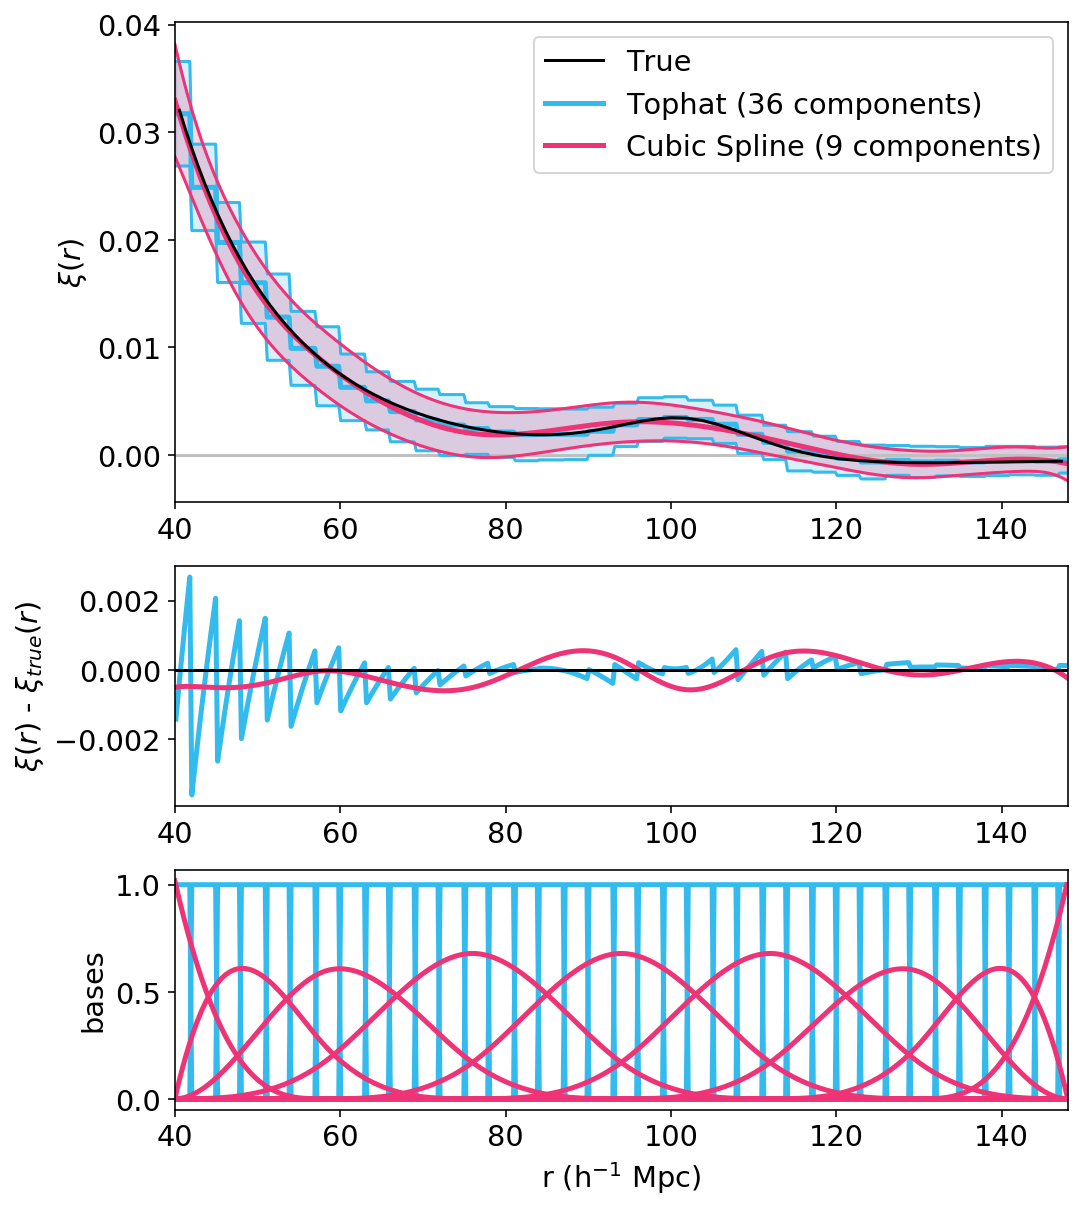

In [112]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_tophat_bw3', '_spline3_bw12_xlim']

colors = [ctopmany, cspline]
labels = ['Tophat (36 components)', 'Cubic Spline (9 components)']
plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels)

(2, 1000)
rmse: True
plotting
0.0010186 100000.0


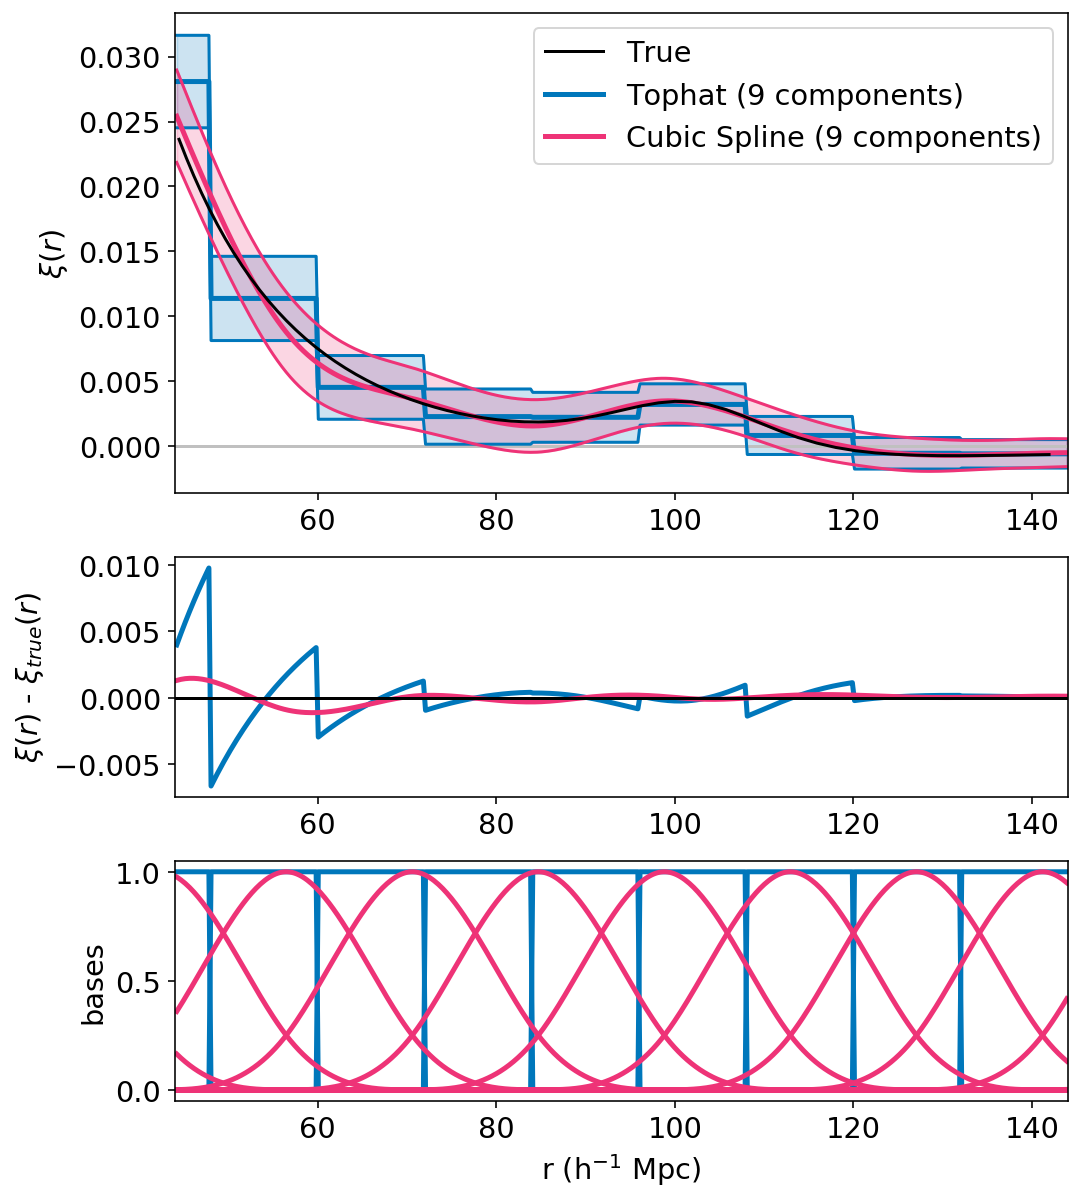

In [107]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_tophat_bw12', '_spline3_bw12']

colors = [ctopfew, cspline]
labels = ['Tophat (9 components)', 'Cubic Spline (9 components)']
plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels)

(2, 1000)
rmse: True
plotting
0.0010186 100000.0


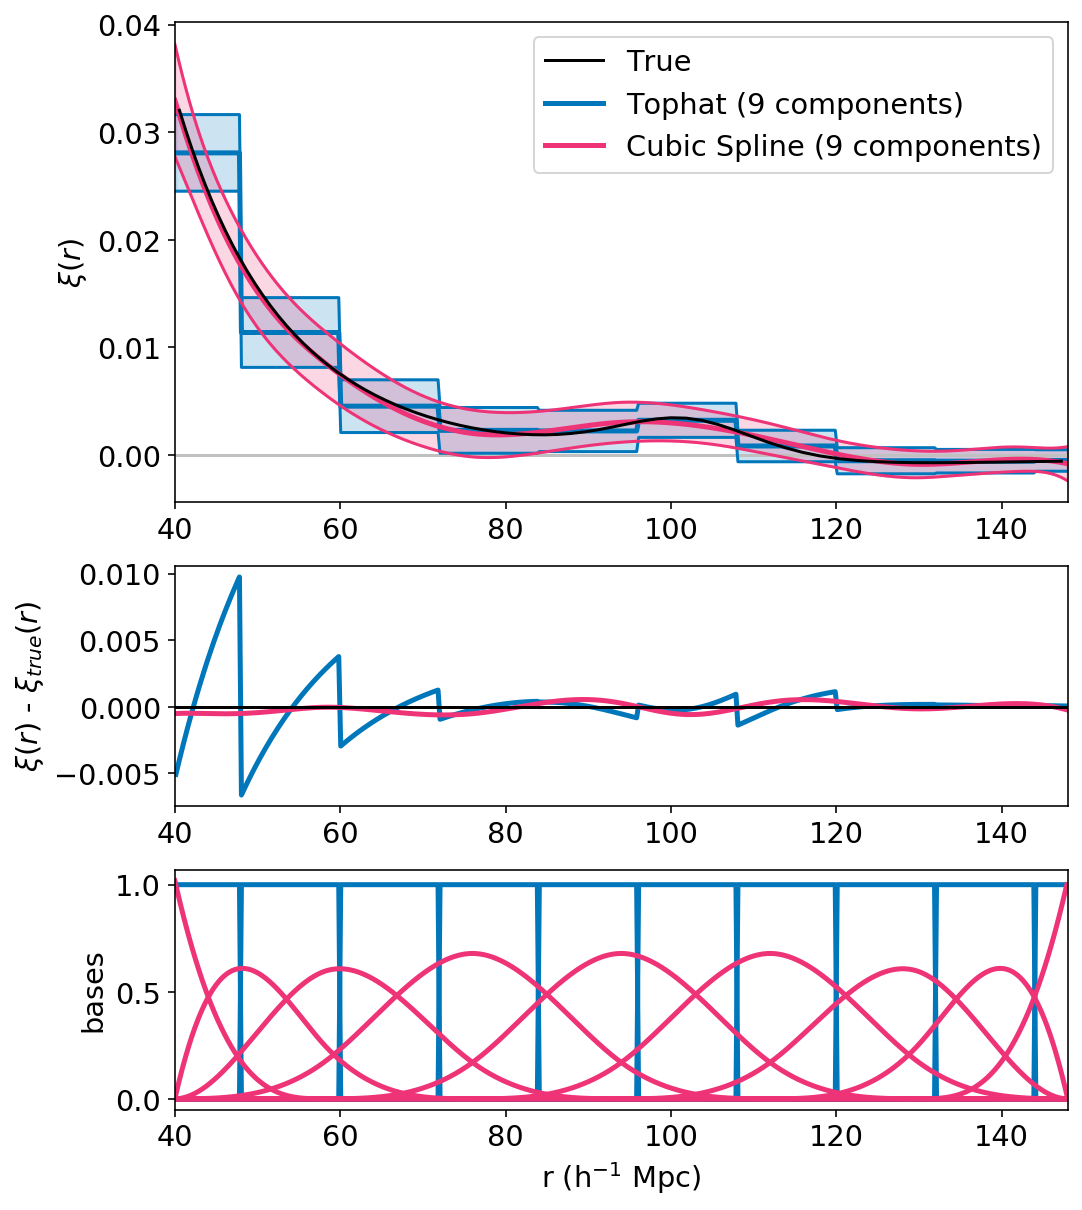

In [110]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_tophat_bw12', '_spline3_bw12_xlim']

colors = [ctopfew, cspline]
labels = ['Tophat (9 components)', 'Cubic Spline (9 components)']
plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels)

(2, 1000)
rmse: True
plotting
0.0010186 100000.0


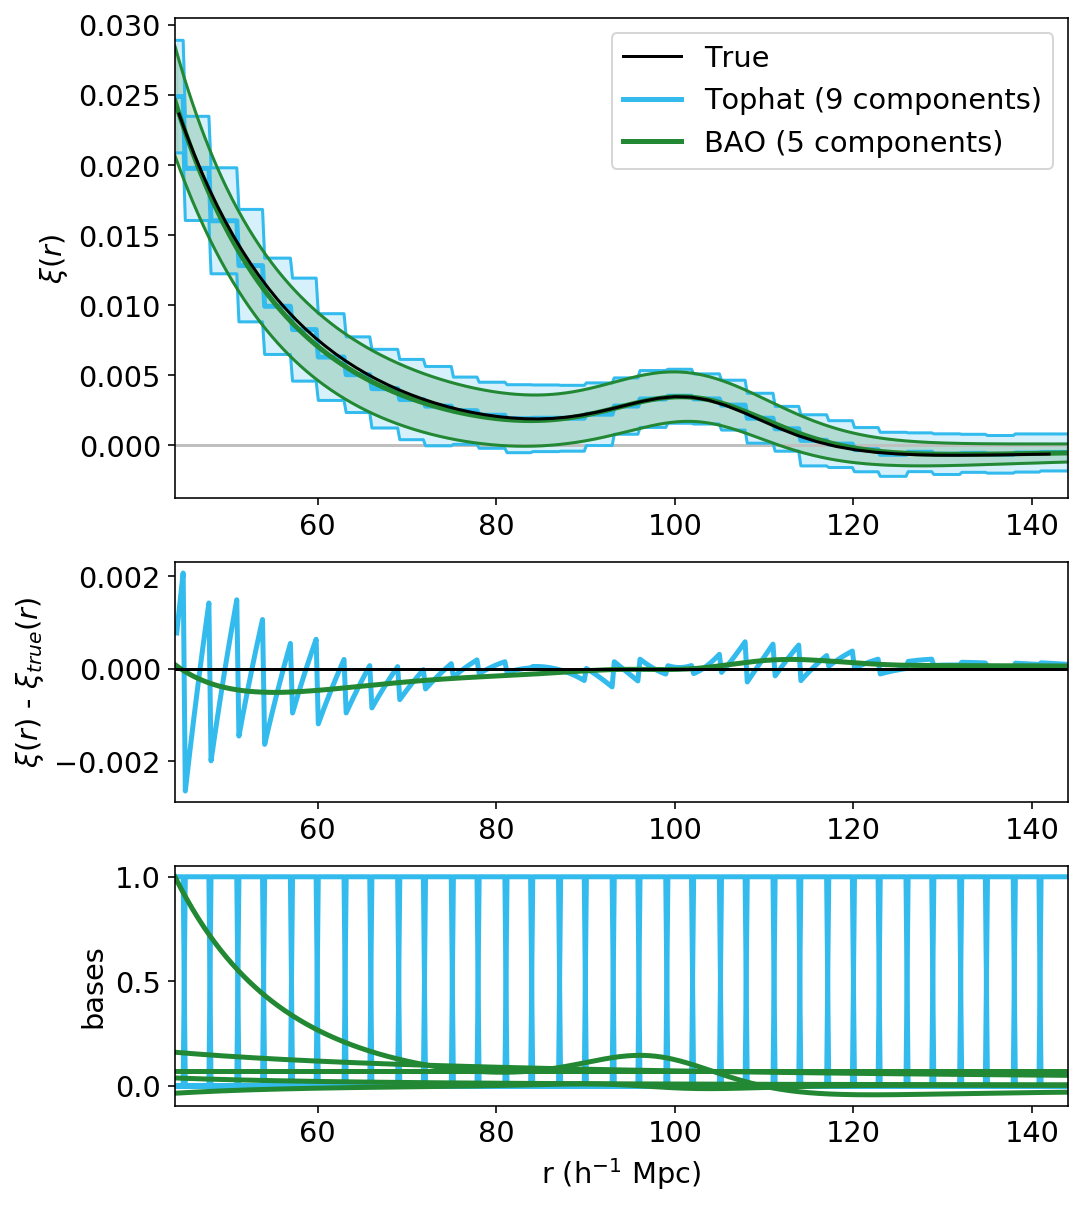

In [105]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_tophat_bw3','_baoiter_cosmob17']

colors = [ctopmany, cbao]
labels = ['Tophat (9 components)', 'BAO (5 components)']
plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels)

0.01015590235321608
(1, 1000)
rmse: True
plotting
0.0010186 100000.0


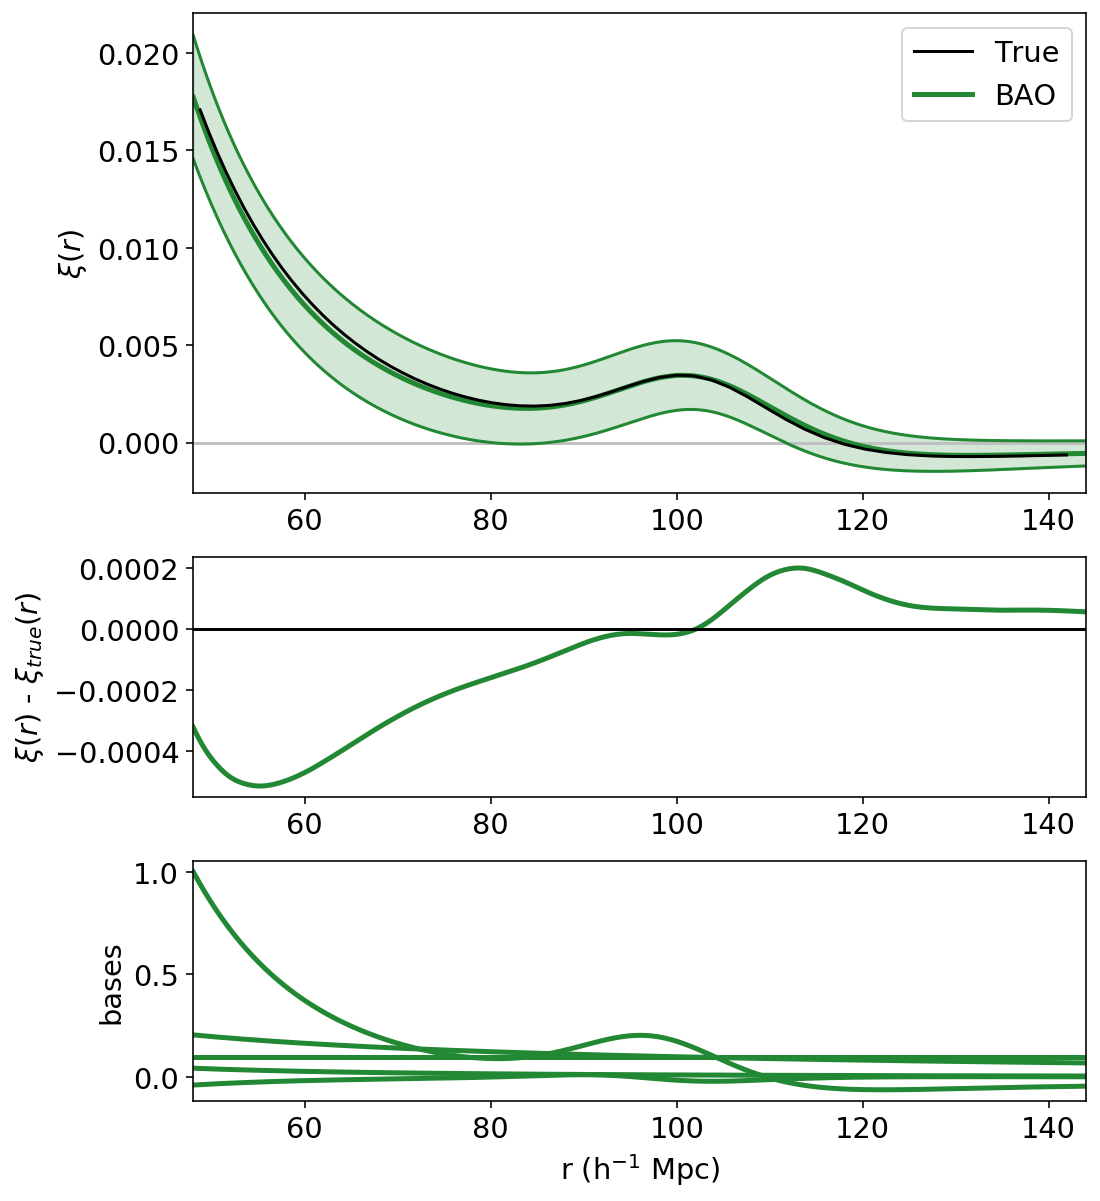

In [69]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_baoiter_cosmob17']

colors = [cbao]
labels = ['BAO']
plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels)

(1, 1000)
rmse: True
plotting
0.0010186 100000.0


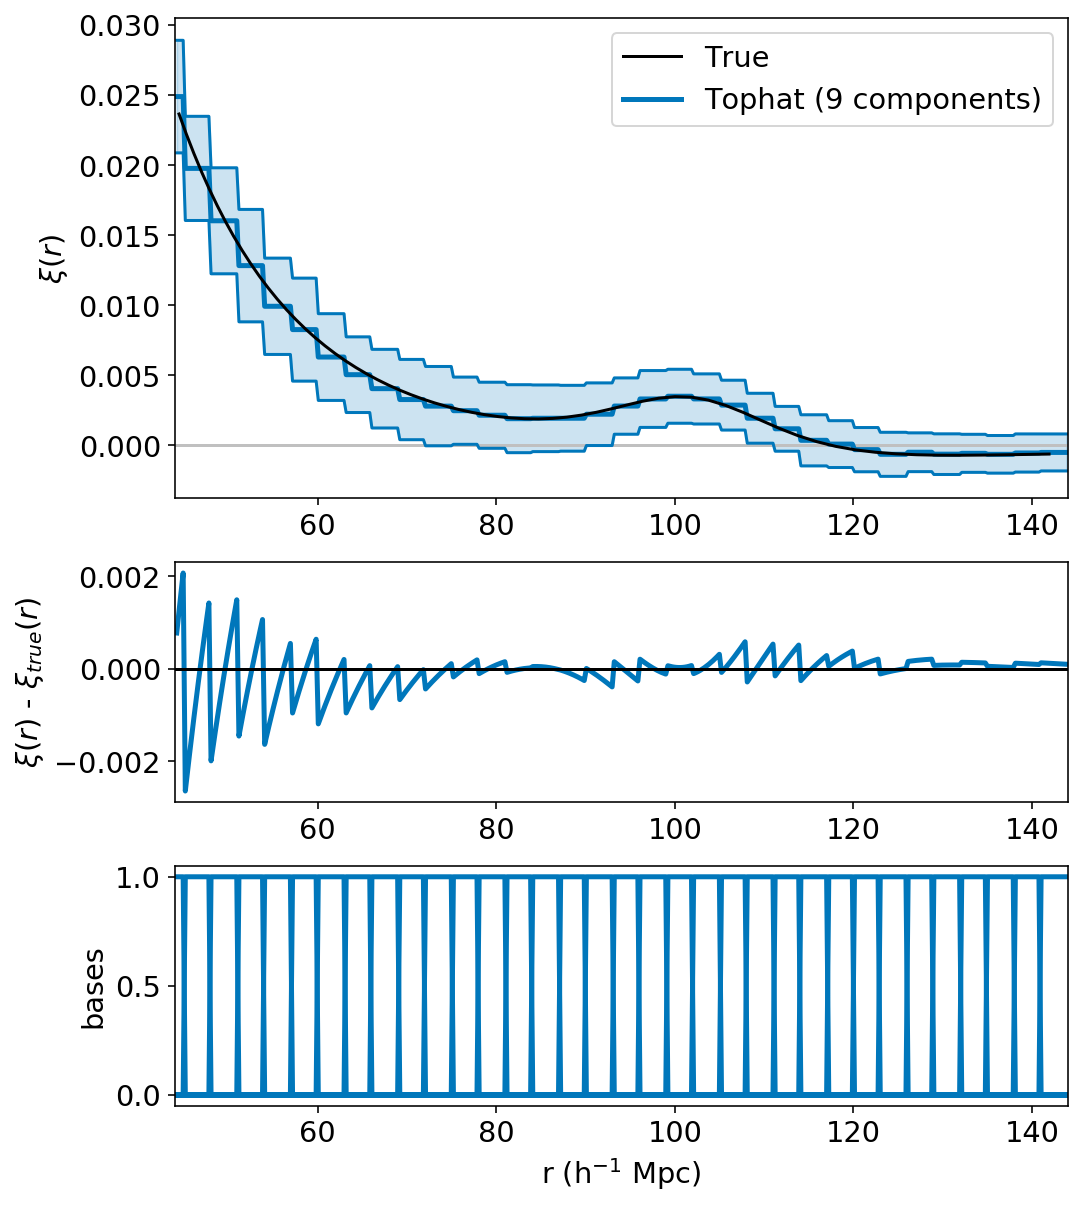

In [103]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_tophat_bw3']

colors = [ctopfew]
labels = ['Tophat (9 components)']
plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels)

(3, 1000)
rmse: True
plotting
0.0010186 100000.0


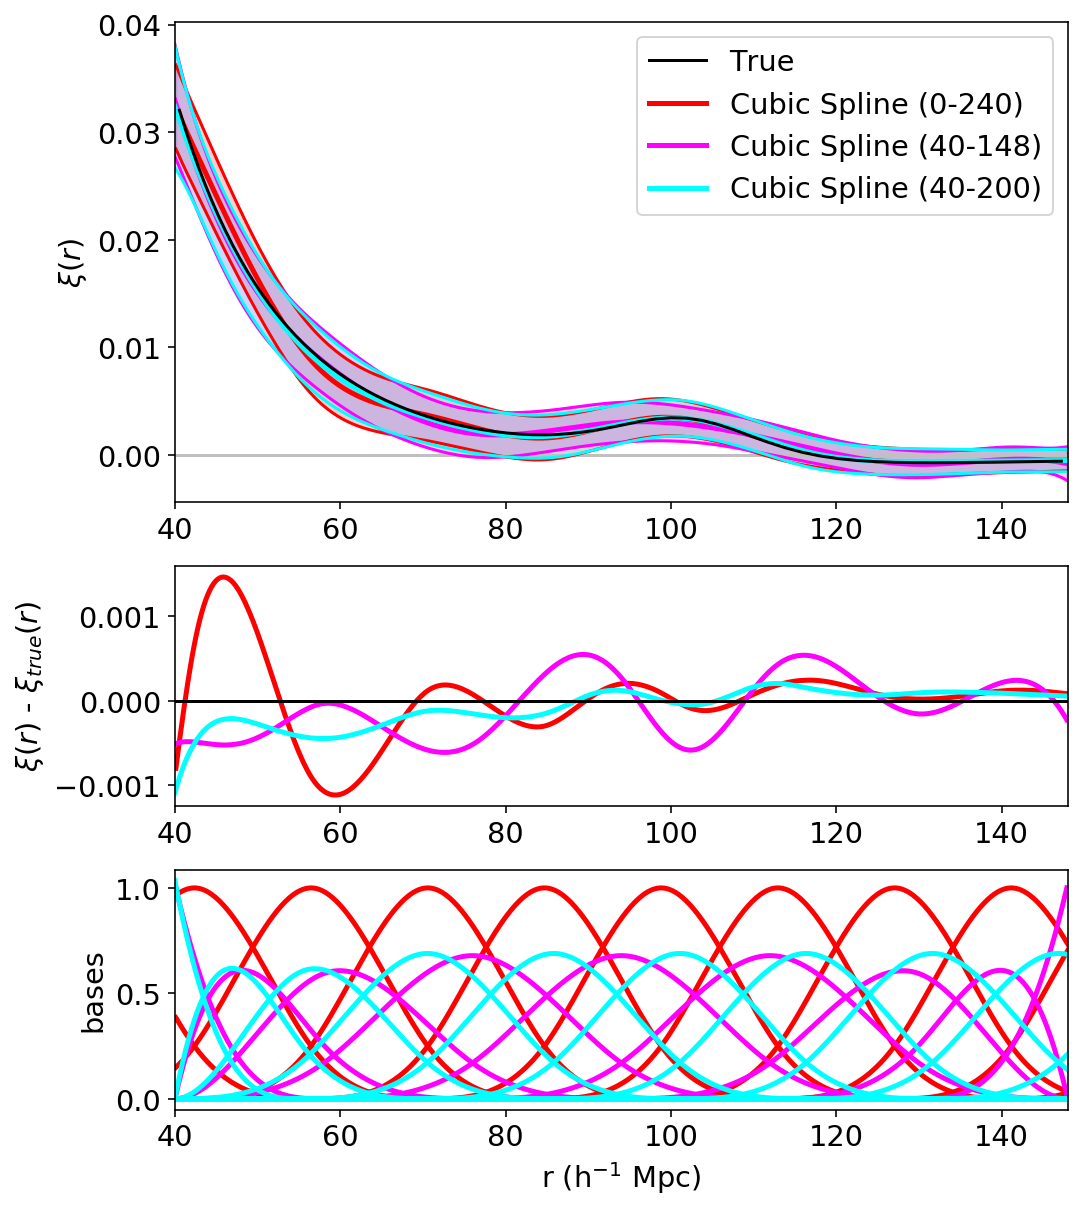

In [124]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_spline3_bw12', '_spline3_bw12_xlim', '_spline3_bw12_xlim200']

colors = ['red', 'magenta', 'cyan']
labels = ['Cubic Spline (0-240)', 'Cubic Spline (40-148)', 
           'Cubic Spline (40-200)']
plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels)

(3, 1000)
rmse: True
plotting
0.0010186 100000.0


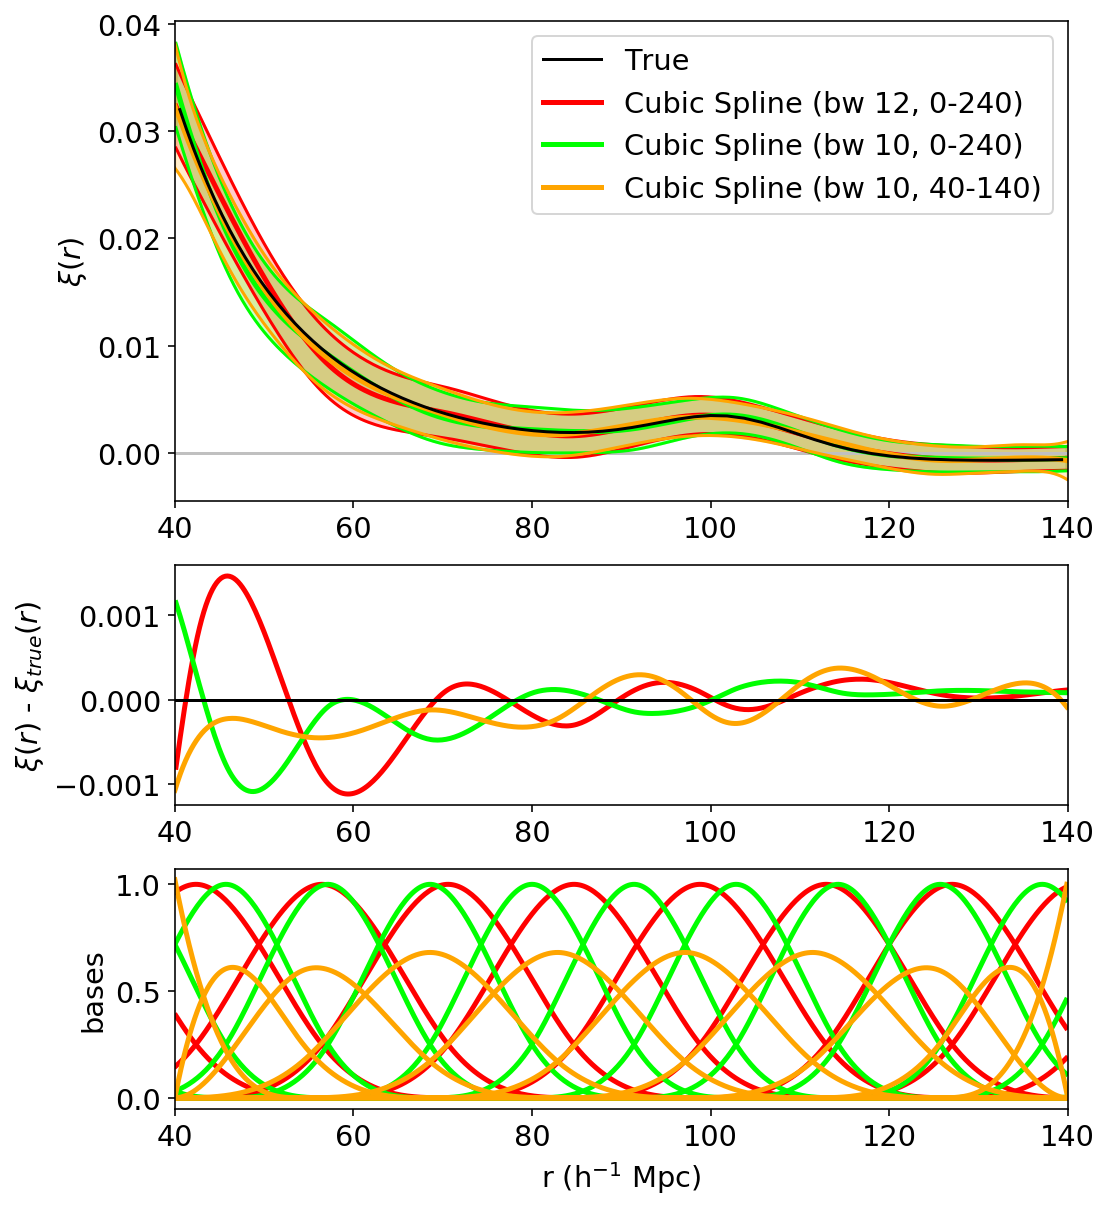

In [133]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_spline3_bw12', '_spline3_bw10_xlim240', '_spline3_bw10_xlim40-140']

colors = ['red', 'lime', 'orange']
labels = ['Cubic Spline (bw 12, 0-240)', 'Cubic Spline (bw 10, 0-240)', 'Cubic Spline (bw 10, 40-140)']
plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels, xlim=[40,140])